In [2]:
%matplotlib inline

import os

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

random_state = 42

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=10000)

170508288/170498071 [==============================] - 3s 0us/step


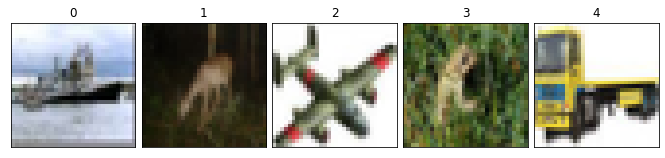

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(i)
    ax.imshow(x_train[i])

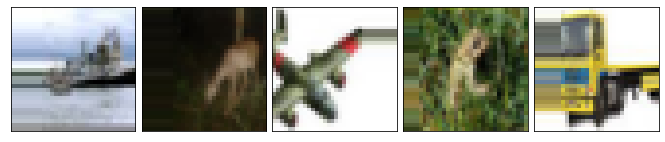

In [5]:
datagen = ImageDataGenerator(width_shift_range=0.4) # 左右にずらす

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

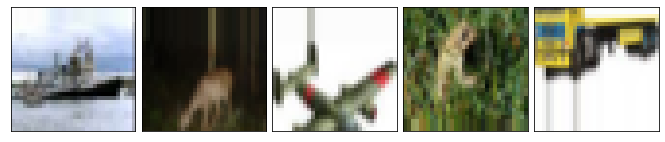

In [6]:
datagen = ImageDataGenerator(height_shift_range=0.4) # 縦ににずらす

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batach in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
      ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
      ax.imshow(x_batch[i])
    break

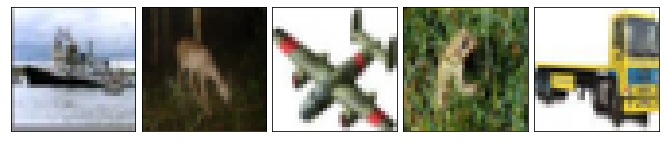

In [7]:
datagen = ImageDataGenerator(horizontal_flip=True) # 左右反転

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

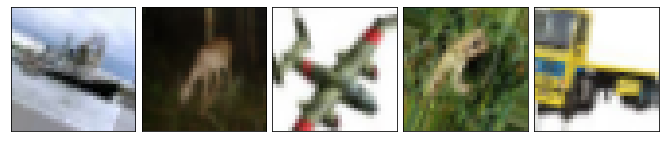

In [8]:
datagen = ImageDataGenerator(rotation_range=30) # 回転

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
      ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
      ax.imshow(x_batch[i])
    break

In [9]:
# 可視化用に値のrangeを[0, 1]に修正
def normalize(x):
  max_x = np.max(x, axis=(0, 1), keepdims=True) # axisを指定しないと配列全体の最大値を取得してしまう。axisを指定することで列方向、行方向の中での最大値を取得できる。
  min_x = np.min(x, axis=(0, 1), keepdims=True)
  return (x - min_x) / (max_x - min_x)

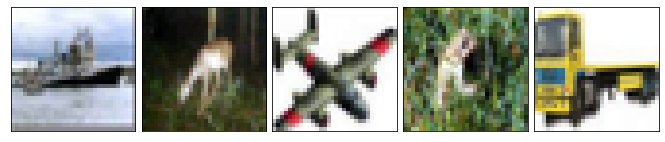

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# samplewise_center: 真理値．各サンプルの平均を0にします．
# samplewise_std_normalization: 真理値．各入力をその標準偏差で正規化します
gcn_whitening = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)
gcn_whitening.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in gcn_whitening.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
        ax.imshow(normalize(x_batch[i])) # 画像データの正規化
    break

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


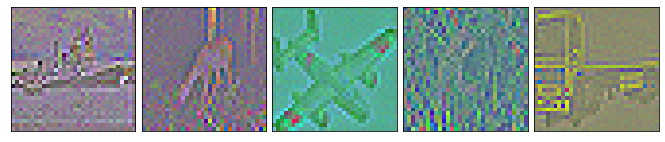

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zca_whitening = ImageDataGenerator(zca_whitening=True)

zca_whitening.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in zca_whitening.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(normalize(x_batch[i]))
    break

In [11]:
# from tensorflow.keras.layers.normalization import BatchNormalization

# model.add(BatchNormalization())

# def rasblock(x, filter=64, kernel_size=(3,3)):
#   x_ = Conv2D(filters,kernel_size=kernel_size, padding='same')(x)
#   x_ = BatchNormalization()
#   x_ = Conv2D(filters, kernel_size=kernel_size, padding='same')(x_)
#   x = Add([x_, x])
#   x = BatchNormalization()
#   x = Activation('relu')(x)
#   return x


# from keras import backend as K

# inputs = Input(shape(32, 32, 3))
# x = Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu')(inputs)
# x = resblock(x)
# x = resblock(x)
# x = Flatten()(x)
# y = Dense(10, activation='softmax')(x)

# model = Model(inputs=inputs, outputs=y)
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(x_train, y_train, batch_size=128, epochs=3, verbose=1)

In [22]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')
weights = [com.get_weights() for com in model.layers[1:]]

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))) # 32x32x3 -> 30x30x64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 30x30x64 -> 28x28x64
model.add(MaxPooling2D(pool_size=(2, 2))) # 28x28x64 -> 14x14x64

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 14x14x64 -> 12x12x128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 12x12x128 -> 10x10x128
model.add(MaxPooling2D(pool_size=(2, 2))) # 10x10x128 -> 5x5x128

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# 上記のようにモデルを構築したのち、ロードした重みを各層に設定します。
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[3].set_weights(weights[3])
model.layers[4].set_weights(weights[4])

In [23]:
# モデルの保存
model.save('./mnist_cnn.h5')

In [24]:
from tensorflow.keras.models import load_model

model = load_model('./mnist_cnn.h5')
y_pred = model.predict(x_valid)

In [25]:
y_pred

array([[9.7659094e-17, 4.3497751e-33, 9.9999857e-01, ..., 1.4025105e-06,
        1.9013599e-22, 1.5552894e-20],
       [7.8940576e-18, 1.0736431e-26, 2.1021215e-05, ..., 2.9967673e-06,
        5.3163580e-12, 1.8286240e-05],
       [1.2965921e-20, 2.0719289e-31, 8.6503826e-07, ..., 9.9999917e-01,
        5.7790587e-23, 1.5814553e-17],
       ...,
       [2.7507199e-10, 9.2098716e-23, 1.9774802e-01, ..., 8.0076879e-01,
        1.4740652e-03, 4.0431428e-06],
       [4.4943693e-09, 7.8066118e-30, 9.9777597e-01, ..., 3.7257129e-04,
        2.4328651e-08, 9.1552965e-10],
       [1.6472850e-12, 1.7331746e-21, 9.9966109e-01, ..., 4.1457068e-05,
        1.2048629e-11, 2.9749790e-04]], dtype=float32)